<a href="https://colab.research.google.com/github/mahidher/Linear-Poly-Logistic-Regression/blob/master/Logistic_Regression(Diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


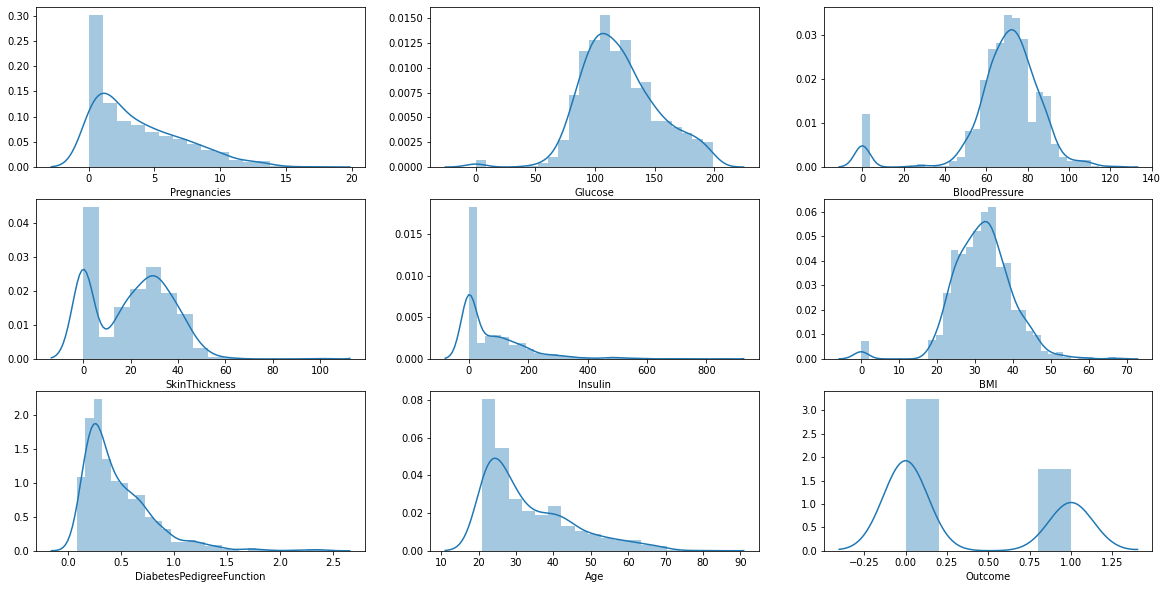

In [163]:
counter= 1
plt.figure(figsize=(20,10))
for col in data.columns:
  
  plt.subplot(3,3,counter)
  plt.xlabel(col)
  sns.distplot(data[col])
  counter+=1
plt.show()

We have zeroes in the columns,lets replace them with the mean


In [164]:
data.replace()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [165]:
for col in data.iloc[:,:-1].columns:
  data[col].replace(0,data[col].mean(),inplace=True)

In [166]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [167]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [168]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now lets plot a box plot to identify outliers


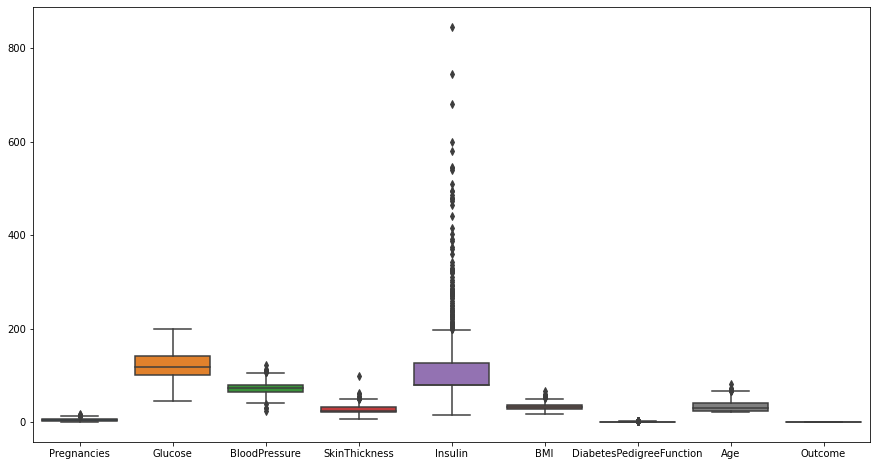

In [169]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

Blood pressure has outliers on top as well as bottom

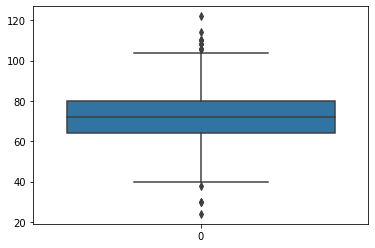

In [170]:
sns.boxplot(data=data['BloodPressure'])

In [171]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
x = data['Insulin'].quantile(0.75) - data['Insulin'].quantile(0.25) 
x

47.45052083333333

As you can see,boxplot shows outliers as dots above and below the whiskers


In [173]:
data['Insulin'].quantile(0.75) + 1.5 *x 

198.42578125

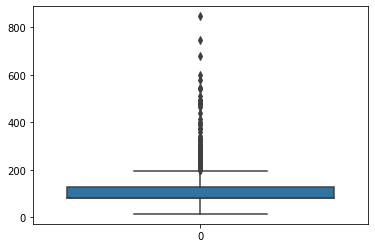

In [174]:
sns.boxplot(data=data['Insulin'])

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [176]:

for col in data.iloc[:,:-1].columns:
  interquantile = data[col].quantile(0.75) - data[col].quantile(0.25) 
  upper = data[col].quantile(0.75) + 1.5 *interquantile 
  lower = data[col].quantile(0.25) - 1.5 *interquantile 
  data = data[(data[col]<upper) & (data[col]>lower)]

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               582 non-null    float64
 1   Glucose                   582 non-null    float64
 2   BloodPressure             582 non-null    float64
 3   SkinThickness             582 non-null    float64
 4   Insulin                   582 non-null    float64
 5   BMI                       582 non-null    float64
 6   DiabetesPedigreeFunction  582 non-null    float64
 7   Age                       582 non-null    int64  
 8   Outcome                   582 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 45.5 KB


In [178]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


Now lets remove the upper and lower outliers

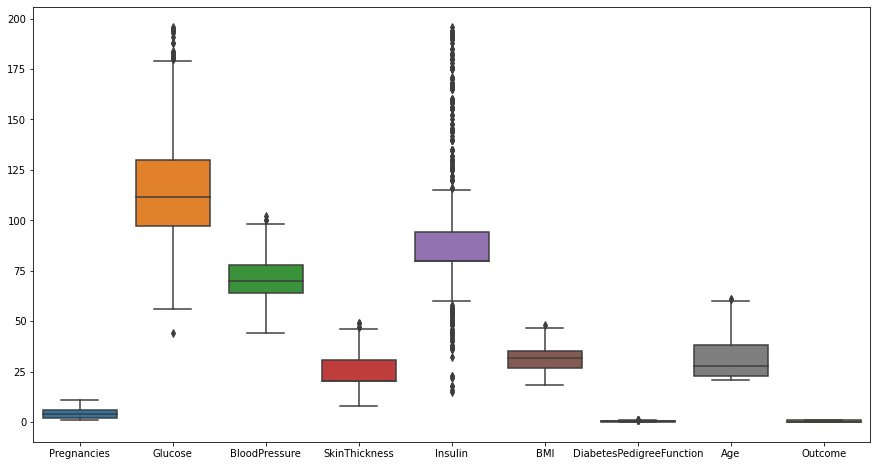

In [179]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

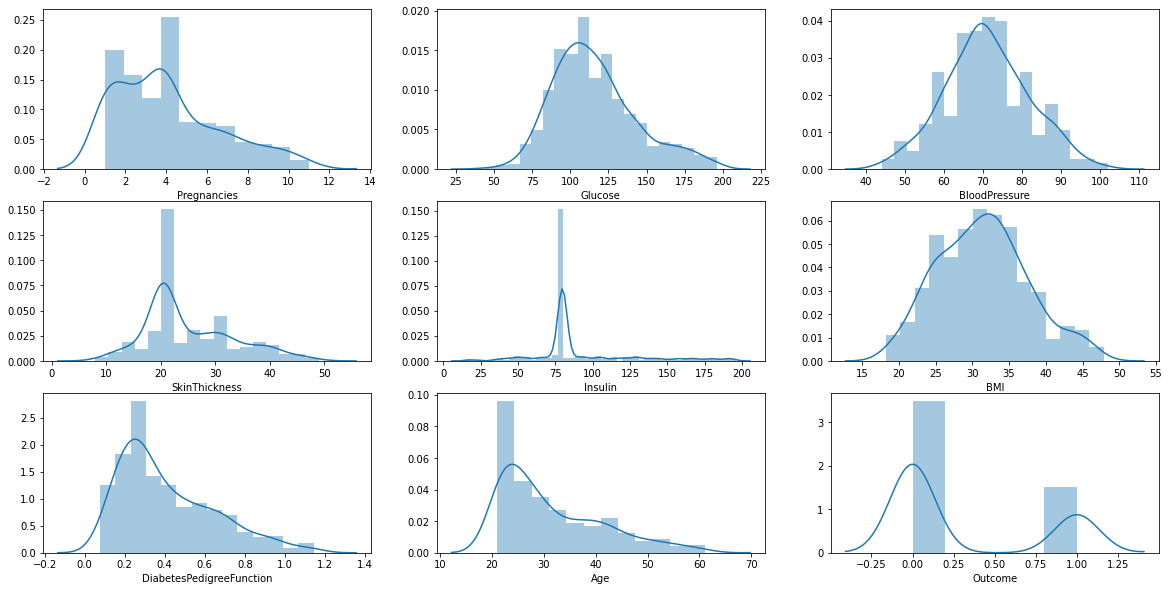

In [180]:
counter= 1
plt.figure(figsize=(20,10))
for col in data.columns:
  
  plt.subplot(3,3,counter)
  plt.xlabel(col)
  sns.distplot(data[col])
  counter+=1
plt.show()

In [181]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

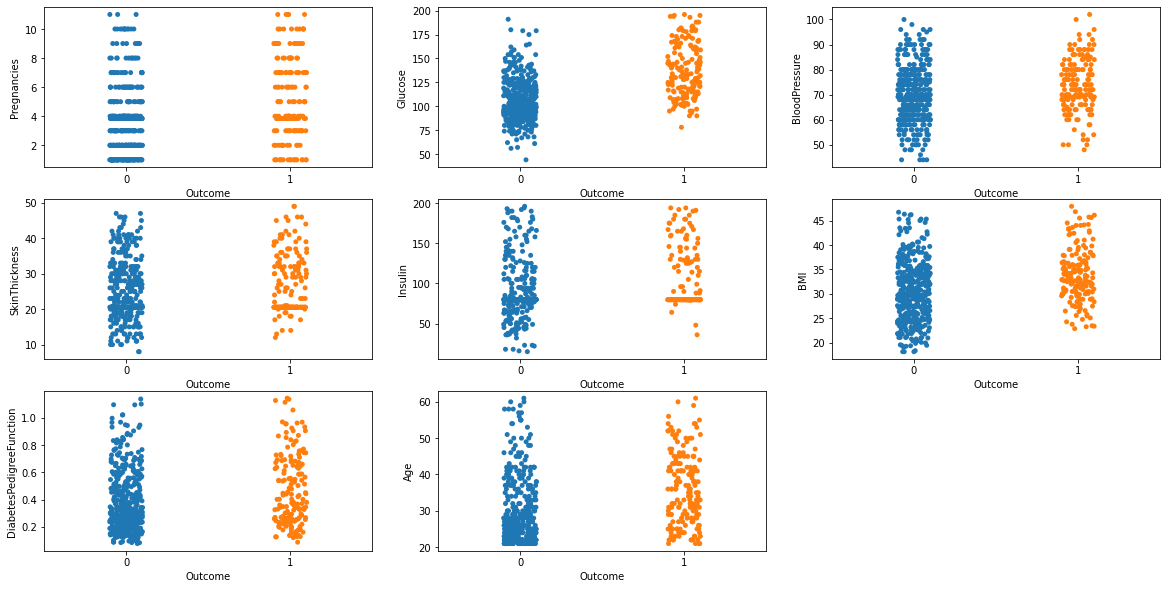

In [182]:
counter= 1
plt.figure(figsize=(20,10))
for col in X.columns:
  
  plt.subplot(3,3,counter)
  plt.xlabel(col)
  sns.stripplot(y,X[col])
  counter+=1
plt.show()

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [184]:
X_scaled = sc.fit_transform(X)
X_scaled  = pd.DataFrame(X_scaled,columns = X.columns)


In [185]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.728880,1.163019,0.083357,1.194942,-0.354949,0.351335,0.899927,1.889081
1,-1.193135,-1.128086,-0.476820,0.462695,-0.354949,-0.791754,-0.259070,-0.040126
2,1.497687,2.435854,-0.663545,-0.570206,-0.354949,-1.330639,1.088894,0.061411
3,-1.193135,-0.982619,-0.476820,-0.269552,0.061468,-0.546806,-1.031735,-1.055499
4,0.344477,-0.000717,0.270082,-0.570206,-0.354949,-0.955053,-0.888960,-0.141664


In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
VIF  = pd.DataFrame()


In [188]:
X_scaled.values

array([[ 0.72888035,  1.16301857,  0.08335671, ...,  0.3513348 ,
         0.89992722,  1.88908076],
       [-1.19313525, -1.12808559, -0.47681962, ..., -0.79175411,
        -0.25907018, -0.04012639],
       [ 1.49768659,  2.43585421, -0.66354506, ..., -1.33063888,
         1.08889418,  0.06141083],
       ...,
       [ 0.34447723,  0.18111679,  0.08335671, ..., -0.85707347,
        -0.70419236, -0.14166361],
       [-1.19313525,  0.36295045, -1.03699594, ..., -0.22020965,
        -0.26746871,  1.58446911],
       [-1.19313525, -0.83715173, -0.10336873, ..., -0.17122013,
        -0.41024375, -0.85242414]])

In [189]:
VIF['values'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
VIF['columns']=X_scaled.columns

In [190]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns


In [191]:
VIF.head()

,values,columns
0,1.484978,Pregnancies
1,1.236979,Glucose
2,1.231783,BloodPressure
3,1.402711,SkinThickness
4,1.224589,Insulin


In [192]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               582 non-null    float64
 1   Glucose                   582 non-null    float64
 2   BloodPressure             582 non-null    float64
 3   SkinThickness             582 non-null    float64
 4   Insulin                   582 non-null    float64
 5   BMI                       582 non-null    float64
 6   DiabetesPedigreeFunction  582 non-null    float64
 7   Age                       582 non-null    float64
dtypes: float64(8)
memory usage: 36.5 KB


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [198]:
lr = LogisticRegression()

In [199]:
logistic_model  = lr.fit(X_train,y_train)

In [200]:
y_pred = logistic_model.predict(X_test)

In [201]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [203]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7808219178082192

In [204]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[92,  6],
       [26, 22]])

In [205]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [206]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9387755102040817

In [207]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7796610169491526

In [208]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8518518518518519

In [209]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6985544217687075

In [210]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

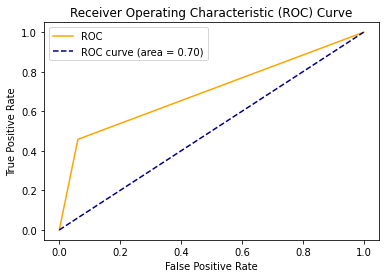

In [211]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()